# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
 <li><a href="#limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#Loading Medical Appointment datasets
df=pd.read_csv("noshowappointments.csv")
#checking first 5 rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
#checking statistical summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

In [5]:
#checking general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#checking for duplicates 
df.duplicated().sum()

0

In [7]:
#checking null values in each column 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#Checking the existince of negative age in our data
def age_variance(age):
    return negative_age
negative_age=df[df['Age'] < 0]
print(negative_age)

          PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.660000e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No  


In [9]:
#We found a negative 1(one) negative age in the dataset which is not possible in real world, so we have to remove it
df.drop(negative_age.index,inplace=True)

In [10]:
#double checking if the row is removed from our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [11]:
#converting to pandas datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()
df=df.drop(["Gender","Neighbourhood"],axis=1)

In [12]:
#convering string values into int
df= df.replace({'No-show': {'yes': 1, 'no': 0}})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   ScheduledDay    110526 non-null  object             
 3   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 4   Age             110526 non-null  int64              
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No-show         110526 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(8), object(2)
memory usage:

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1:Which attributes the Medical Practitioner should consider that the patients will show up for the appointment?

C:\Users\Peter\anaconda3\PeterAnaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Peter\anaconda3\PeterAnaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Peter\anaconda3\PeterAnaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<AxesSubplot:xlabel='PatientId', ylabel='PatientId'>,
        <AxesSubplot:xlabel='AppointmentID', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Age', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Hipertension', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Alcoholism', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Handcap', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SMS_received', ylabel='PatientId'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='AppointmentID', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Age', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Scholarship', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Hipertension', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Diabetes', ylabel='AppointmentID'>,
        <AxesSubplot:xlabel='Alcoholism

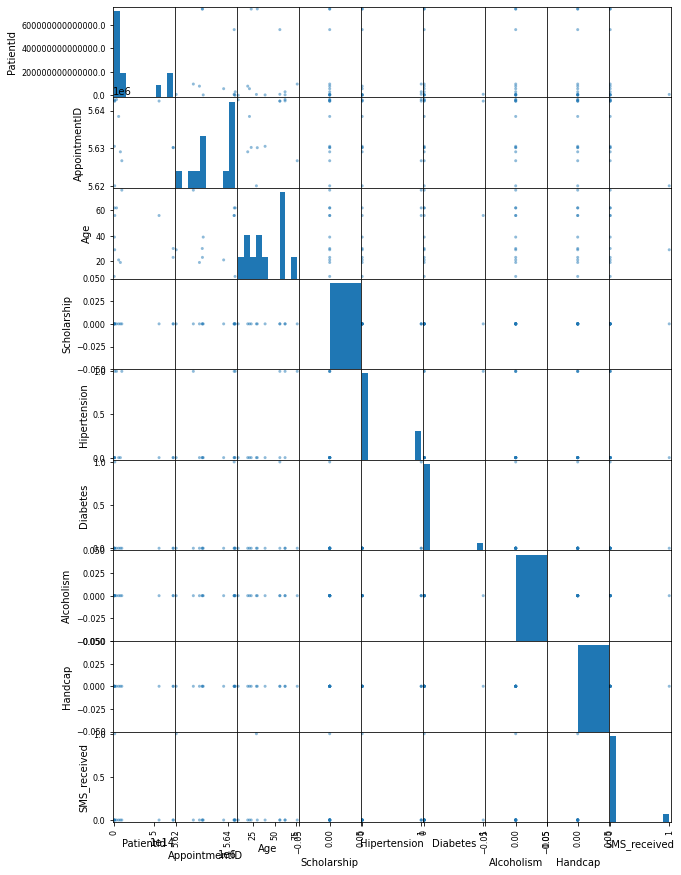

In [14]:
#Plotting the data and finding relatiship between independent variables and dependent variable
pd.plotting.scatter_matrix(df[:12],figsize=(10,15))


### Research Question 2: Is the appointment influenced by the Age of patient?

<AxesSubplot:title={'center':'No Show Vs Age group of Patients'}, xlabel='Age Group', ylabel='No Show'>

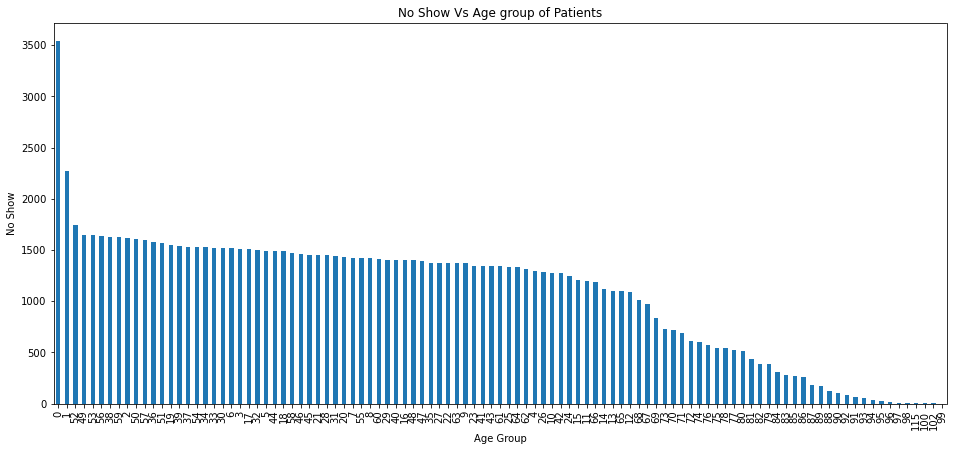

In [15]:
#plotting Age value
plt.title('No Show Vs Age group of Patients')
plt.xlabel('Age Group')
plt.ylabel('No Show');
df["Age"].value_counts().plot(kind="bar",figsize=(16,7))

<AxesSubplot:title={'center':'No Show Vs SMS_Received'}, xlabel='SMS_Received', ylabel='No Show'>

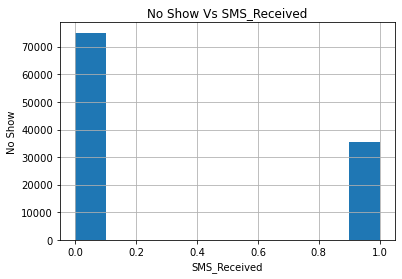

In [16]:
plt.title('No Show Vs SMS_Received')
plt.xlabel('SMS_Received')
plt.ylabel('No Show');df['SMS_received'].hist()
  

In [17]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004019,-0.004124,-0.002877,-0.006432,0.001606,0.011001,-0.007913,-0.009741
AppointmentID,0.004019,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.014107,-0.256613
Age,-0.004124,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633
Scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192
Hipertension,-0.006432,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270
Diabetes,0.001606,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552
Alcoholism,0.011001,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149
Handcap,-0.007913,0.014107,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162
SMS_received,-0.009741,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000


<a id='conclusions'></a>
## Conclusions
In summmary, it was found that the patients who didnot receiced SMS received had higher chances to taking the appointment compared to those who didnot receive sms, this means that, the sms notification was not a big factor in determining whether the patient will show up or not. On the other hand, age of the patient was slighlty corrected no show as the younger patients  had higher attendence rate. I also found that the recipient of schoolarship didnot contribute to the overall attendenace rate.


<a id='limitation'></a>
## Limitation
The dataset could have include the distance of patient from the city of , doing this will help find us predict if the distance was the factor the patient didnot show or show up.